# A Deep Analysis in the Numbers of the COVID-19 Pandemic in united states with python and tableau

### Importing Libraries
The libraries used in this notebook are:

In [1]:
import opendatasets as od
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

### Data Preparation and Cleaning

For the purposes of this work the data will be retrieved from  NY-TIMES COVID-19 USA dataset , which is updated in a Regular basis bases on the information reported officially by the government.

#### Our NY-TIMES COVID-19 USA Dataset

Our NY-TIMES COVID-19 USA dataset is a scientific online publication that focuses on COVID-19 Pandemic in united states.

    https://www.kaggle.com/


if you dont have a kaggle account you can skip to (df = pd.read_csv('US_covid_data.csv')), but you must know that the data wont be uptodate

In [2]:
# NY-TIMES COVID-19 USA dataset URL:
url = 'https://www.kaggle.com/datasets/imoore/us-covid19-dataset-live-hourlydaily-updates'

# Retrive .CSV file from kaggle
od.download('https://www.kaggle.com/datasets/imoore/us-covid19-dataset-live-hourlydaily-updates')

Skipping, found downloaded files in ".\us-covid19-dataset-live-hourlydaily-updates" (use force=True to force download)


Then we can read it with Pandas using the module .read_cvs()

In [3]:
df = pd.read_csv('./us-covid19-dataset-live-hourlydaily-updates/States.csv')
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


Just by observing at the printed data frame it is easy to observe the following:

    The file provides data from each state
    The data is categorized by date and state
    The data is provided in a Regular basis
    There are several metrics inside the dataset.

It is important to keep in mind that this data is officially reported data, which means that the actual number of cases, deaths and more metrics presented in here may be higher, since not all the cases are diagnosed as COVID-19 cases.

One can see the basic information of the data frame using the .info() method.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42566 entries, 0 to 42565
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    42566 non-null  object
 1   state   42566 non-null  object
 2   fips    42566 non-null  int64 
 3   cases   42566 non-null  int64 
 4   deaths  42566 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ MB


From the information above, we can observe that the dataset has 4 columns with different type of data focusing on:

    Cases (Positive diagnosed cases)
    Deaths (Deaths related to COVID-19)


#### Creating Data Frames

We will focus on cases and deaths So there is no need for fips column  so let's drop it i

In [5]:
## Let us drop the fips column from dataset, as follows:
df.drop('fips', axis=1, inplace=True)

In [6]:
## Let us see the dataset
df.head()

,date,state,cases,deaths
0,2020-01-21,Washington,1,0
1,2020-01-22,Washington,1,0
2,2020-01-23,Washington,1,0
3,2020-01-24,Illinois,1,0
4,2020-01-24,Washington,1,0


Now, let us create new .CSV file based on the recently crated data frame . To do so, you can use the method to_cvs(), from Pandas, which creates a CVS file from a data frame.

notice that the second argument of the method is index=False, this is to avoid passing the high numbers from the original dataset.

In [7]:
# save the data

df.to_csv('US_covid_data.csv', index=False)

By saving the data frames before start cleaning or modifying the data frames warranties that we have a backup of the data, without the need to redo the data filtration.

#### Cleaning the DataFrame

Before starting to work with the data frame, it is important to verify that all the information was input correctly and in a reasonable manner.

We will read the new CSV files created in the previous sections.

In [8]:
# Read CSV file
df = pd.read_csv('US_covid_data.csv')

Let us verify that each of the data frames were imported correctly by printing the first and last 5 rows.

To print the first 5 rows of a data frame, we can use the .head() method, for example:

In [9]:
df.head(5)

,date,state,cases,deaths
0,2020-01-21,Washington,1,0
1,2020-01-22,Washington,1,0
2,2020-01-23,Washington,1,0
3,2020-01-24,Illinois,1,0
4,2020-01-24,Washington,1,0


Now, let us do the same with the bottom of the data frames:

In [10]:
df.tail(5)

,date,state,cases,deaths
42561,2022-04-11,Virginia,1678215,19884
42562,2022-04-11,Washington,1469439,12627
42563,2022-04-11,West Virginia,498542,6755
42564,2022-04-11,Wisconsin,1591806,14349
42565,2022-04-11,Wyoming,156281,1796


We know that the date is in a YEAR-MONTH-DAY format, but it would be good to have it in separate columns for an easier access to the information.

For that we can this with .DatetimeIndex(), which splits the date in the desire format as follows:

In [11]:
# Split the column date into, month, day, year, weekday
df['month'] = pd.DatetimeIndex(df.date).month
df['day'] = pd.DatetimeIndex(df.date).day
df['year'] = pd.DatetimeIndex(df.date).year
df

,date,state,cases,deaths,month,day,year
0,2020-01-21,Washington,1,0,1,21,2020
1,2020-01-22,Washington,1,0,1,22,2020
2,2020-01-23,Washington,1,0,1,23,2020
3,2020-01-24,Illinois,1,0,1,24,2020
4,2020-01-24,Washington,1,0,1,24,2020
...,...,...,...,...,...,...,...
42561,2022-04-11,Virginia,1678215,19884,4,11,2022
42562,2022-04-11,Washington,1469439,12627,4,11,2022
42563,2022-04-11,West Virginia,498542,6755,4,11,2022
42564,2022-04-11,Wisconsin,1591806,14349,4,11,2022


As we can see, at the very right of the data frame we have 4 new columns, month, day, and year.

Now lets Check for NaN.

In [12]:
df.isnull().values.any()

False

as we can see ther is no Nan values in the Dataset

Now that we have the datasets separately we can perform a quick statistical by using the .describe() method which returns information such as mean, standard deviation, minimum/maximum values and number of non-empty values.

In [13]:
df.describe()

,cases,deaths,month,day,year
count,4.256600e+04,42566.000000,42566.000000,42566.000000,42566.000000
mean,5.289421e+05,8538.260725,6.350421,15.684232,2020.739745
std,9.162382e+05,13459.921682,3.447961,8.807076,0.676967
min,1.000000e+00,0.000000,1.000000,1.000000,2020.000000
25%,3.360850e+04,617.000000,3.000000,8.000000,2020.000000
50%,1.903305e+05,3066.000000,6.000000,16.000000,2021.000000
75%,6.498182e+05,10383.500000,9.000000,23.000000,2021.000000
max,9.134794e+06,89484.000000,12.000000,31.000000,2022.000000


We can use the .sample method to retrieve a random sample of rows from the data frame.

In [14]:
df.sample(10)

,date,state,cases,deaths,month,day,year
2263,2020-04-12,Virgin Islands,51,1,4,12,2020
26633,2021-06-29,Wyoming,62195,747,6,29,2021
42015,2022-04-02,District of Columbia,136886,1333,4,2,2022
14197,2020-11-15,Vermont,2889,59,11,15,2020
37582,2022-01-13,Alabama,1004622,16641,1,13,2022
39271,2022-02-12,District of Columbia,132820,1309,2,12,2022
14574,2020-11-22,Pennsylvania,313788,9901,11,22,2020
30964,2021-09-16,Pennsylvania,1365049,28768,9,16,2021
37941,2022-01-19,Massachusetts,1503398,21208,1,19,2022
3146,2020-04-28,West Virginia,1096,38,4,28,2020


## Analyzing data from data frames

Let's try to answer some questions about our data.

#### Q1: When was the first confirmed case reported in United State?

to answer this question we can use the .neor Not Equal to a certain value, in this case 0, and it can be applied to the new_cases series.

In [15]:
first_confirmed_case = df.date.loc[df['cases'].ne(0).idxmax()]
state1 = df.state.loc[df['cases'].ne(0).idxmax()]

In [16]:
print("The first confirmed case in United State was was recorded in the state of {} on {} ".format(state1, str(first_confirmed_case)))

The first confirmed case in United State was was recorded in the state of Washington on 2020-01-21 


#### Q2: When was the first death related to COVID-19 reported?

In [17]:
first_death = df.date.loc[df['deaths'].ne(0).idxmax()]
state2= df.state.loc[df['cases'].ne(0).idxmax()]

In [18]:
print("The first death related to COVID-19 in United State was reported in the state of {} on {}.".format(state2, str(first_death)))

The first death related to COVID-19 in United State was reported in the state of Washington on 2020-02-29.


#### Q3: What are the total number of reported cases and deaths related to Covid-19 in United State?

In [19]:
# total deaths with out duplicate
total_cases = df.groupby('state')['cases'].max().sum()

In [20]:
# total deaths with out duplicate
total_deaths = df.groupby('state')['deaths'].max().sum()

In [21]:
print('The number of reported cases is {} and the number of reported deaths is {}.'.format(int(total_cases), int(total_deaths)))

The number of reported cases is 80327835 and the number of reported deaths is 987849.


#### Q4: What is the overall death rate (ratio of reported deaths to reported cases)?

In [22]:
death_rate = total_deaths / total_cases

In [23]:
print('The overall reported death rate in United State is {:.2f} %'.format(death_rate*100))

The overall reported death rate in United State is 1.23 %


#### Q5: wich stat have the highest cases recorded

In [24]:
# total cases with out duplicate
states_cases = df.groupby('state')['cases'].max()
# the value of highest cases recored
top_state_cases = states_cases.max()
# the state id
state_c = states_cases.idxmax()
print('The state with the highest cases recoreded so far is {} with total recordrd cases {}'.format(state_c,  top_state_cases))

The state with the highest cases recoreded so far is California with total recordrd cases 9134794


#### Q6: wich stat have the highest deaths 

In [25]:
# total deaths with out duplicate
states_deaths = df.groupby('state')['deaths'].max()
# the value of highest deaths
top_state_deaths = states_deaths.max()
# the state id
state_d =states_deaths.idxmax()
print('The state with the highest death so far is {} with total deaths {} '.format(state_d,  top_state_deaths))

The state with the highest death so far is California with total deaths 89484 


#### Q7: wich stat have the highest deaths rate

In [26]:
# lits creat a data table
states_rate = df.groupby('state')['state','cases','deaths'].max()
states_rate['deaths_rate'] = (states_rate['deaths'] / states_rate ['cases'])*100
# lits creat a data table that contain stat name and deaths rate
states_deaths_rate = states_rate.deaths_rate.max()
states_deaths_rate_s = states_rate.deaths_rate.idxmax()

print('The state with the highest death rate so far is {} with total deaths {:.2f} %'.format(states_deaths_rate_s,  states_deaths_rate))

The state with the highest death rate so far is Pennsylvania with total deaths 1.59 %


C:\Users\zain_\AppData\Local\Temp/ipykernel_2652/2289633210.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  states_rate = df.groupby('state')['state','cases','deaths'].max()


## Data Visualization

In order to understand better the information in this dataset, it would be a good idea to visualize it in charts

Let us start by setting up some parameters for the plots that we are going to create

In [27]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (13, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Q8: What are the top 10 states with highest cases recorded?

It will be easier to see this information ploted:

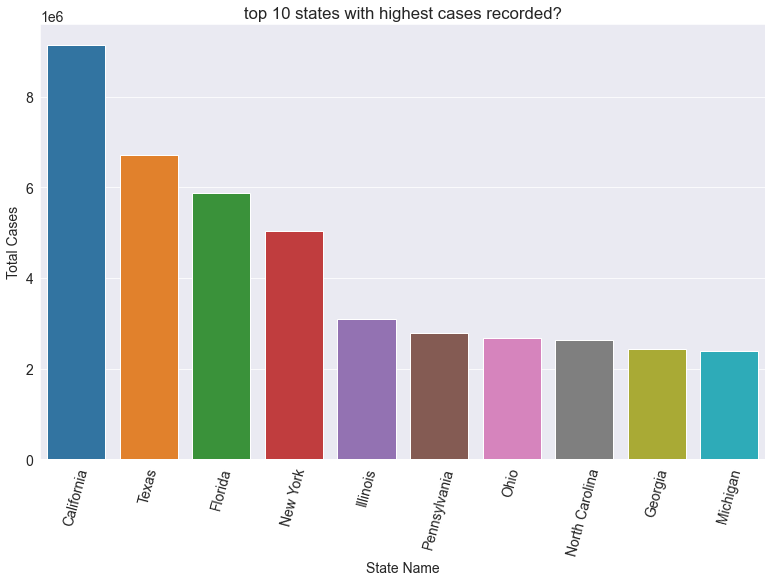

In [28]:
t_states_c = df.groupby('state')['cases'].max().sort_values(ascending=False).head(10)
sns.barplot(x=t_states_c.index, y=t_states_c)
plt.xticks(rotation=75)
plt.ylabel('Total Cases')
plt.xlabel('State Name')
plt.title('top 10 states with highest cases recorded?');

we can see that California is the most affected state with covid followed by texas then Florida

#### Q9: What are the top 10 states with highest deaths?

It will be easier to see this information ploted:

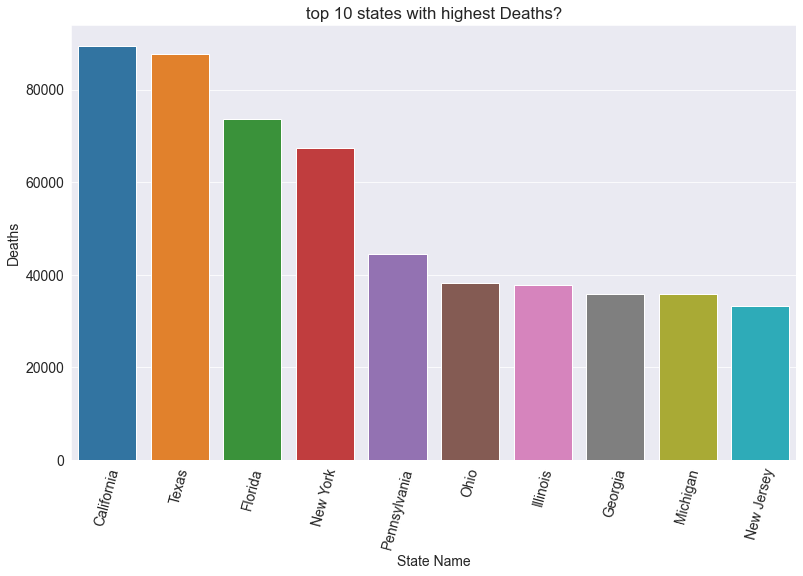

In [29]:
t_states_d = df.groupby('state')['deaths'].max().sort_values(ascending=False).head(10)
sns.barplot(x=t_states_d.index, y=t_states_d)
plt.xticks(rotation=75)
plt.ylabel('Deaths')
plt.xlabel('State Name')
plt.title('top 10 states with highest Deaths?');

we can see that California and Texas and Florida and new york are still the most affected by covid and have the highest deaths, but we also can see that Pennsylvania and Ohio have deaths more than Illinois.

Now let's create a file containing the top 15 states with the highest cases and deaths to use for visualization with tableau

In [30]:
top_states = df.groupby('state')['state','cases','deaths'].max().sort_values(by='cases', ascending=False).head(15)
top_states.to_csv('top_states.csv', index=False)

C:\Users\zain_\AppData\Local\Temp/ipykernel_2652/4189454376.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_states = df.groupby('state')['state','cases','deaths'].max().sort_values(by='cases', ascending=False).head(15)


#### Q10: What are the 10 states with the lowest cases recorded?

It will be easier to see this information ploted:

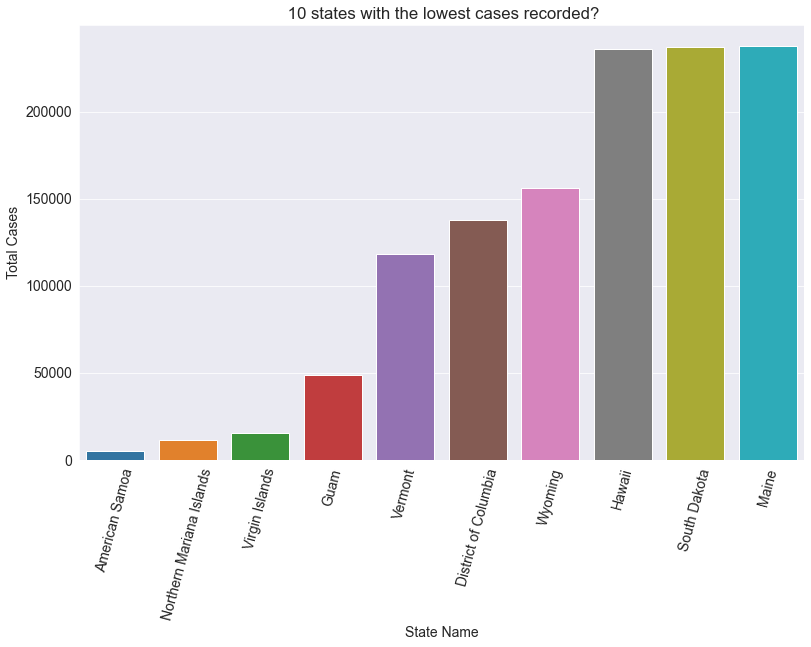

In [31]:
l_states_c = df.groupby('state')['cases'].max().sort_values().head(10)
sns.barplot(x=l_states_c.index, y=l_states_c)
plt.xticks(rotation=75)
plt.ylabel('Total Cases')
plt.xlabel('State Name')
plt.title(' 10 states with the lowest cases recorded?');

we can see that American Samoa has the lowest cases recorded folwed by Northern Mariana islands 

#### Q11: What are the 10 states with the lowest deaths?

It will be easier to see this information ploted:

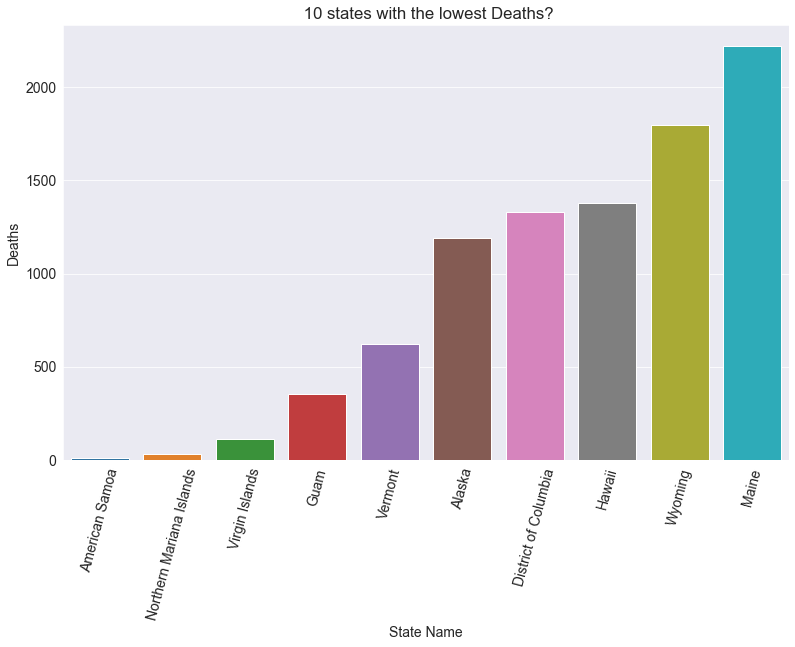

In [32]:
l_states_d = df.groupby('state')['deaths'].max().sort_values().head(10)
sns.barplot(x=l_states_d.index, y=l_states_d)
plt.xticks(rotation=75)
plt.ylabel('Deaths')
plt.xlabel('State Name')
plt.title(' 10 states with the lowest Deaths?');

we can see that American Samoa has the lowest number of deaths

Now let's create a file containing the lowest 15 states with the lowest cases and deaths to use for visualization with tableau

In [33]:
lowest_states = df.groupby('state')['state','cases','deaths'].max().sort_values(by='cases').head(15)
lowest_states.to_csv('lowest_states.csv', index=False)

C:\Users\zain_\AppData\Local\Temp/ipykernel_2652/2555061346.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  lowest_states = df.groupby('state')['state','cases','deaths'].max().sort_values(by='cases').head(15)


#### Q12: What are the 10 states with the highest deaths rate?

It will be easier to see this information ploted:

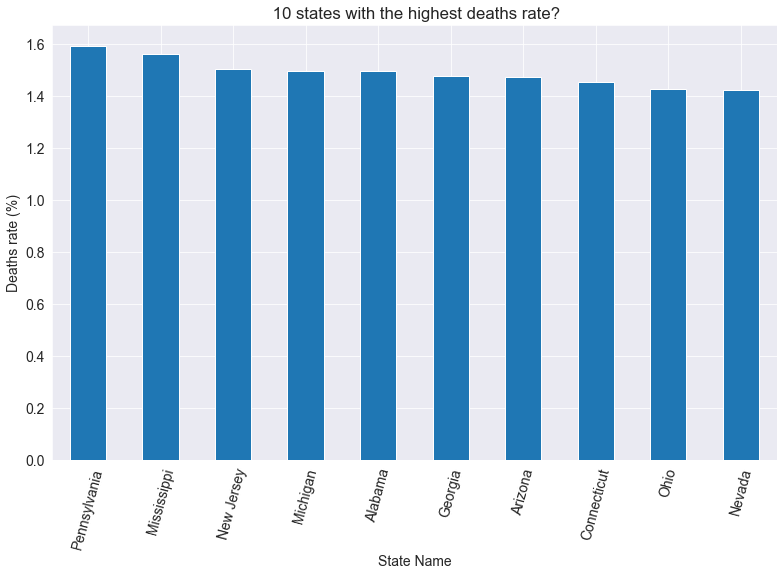

In [34]:
h_d_r = states_rate.deaths_rate.sort_values(ascending=False).head(10)
h_d_r.plot(kind='bar')
plt.xticks(rotation=75)
plt.ylabel("Deaths rate (%)")
plt.xlabel("State Name")
plt.title(' 10 states with the highest deaths rate?');

Although that California has the heights cases recorded and deaths we can't see in this chart and Surprisingly Pennsylvania has the highest deaths rate

Now let's create a file containing the with deaths rate to use for visualization with tableau

In [42]:
highest_d_stats = states_rate[['state', 'deaths_rate']].sort_values(by='deaths_rate', ascending=False).round(2)
highest_d_stats.to_csv('highest_d_stats.csv', index=False)

#### Q13: show the data in a map for better visualization!

first, let's create a file with necessary data (state, cases, deaths, deaths rate, lat, lan)

lets upload the lat and lan file

In [36]:
cord = pd.read_csv('coordinates.csv')
cord.head()

,lat,lon
0,32.318231,-86.902298
1,63.588753,-154.493062
2,-14.270972,-170.132217
3,34.048928,-111.093731
4,35.201050,-91.831833


lets creat the file

In [37]:
us_covied = df.copy()
us_covied = us_covied.groupby('state')['state','cases', 'deaths'].max()
us_covied['deaths_rate'] =(states_rate.deaths_rate).round(2)
us_covied[['lat', 'lon']] = cord[['lat', 'lon']].to_numpy()
us_covied.head()

C:\Users\zain_\AppData\Local\Temp/ipykernel_2652/1034639186.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  us_covied = us_covied.groupby('state')['state','cases', 'deaths'].max()


,state,cases,deaths,deaths_rate,lat,lon
state,,,,,,
Alabama,Alabama,1297091,19379,1.49,32.318231,-86.902298
Alaska,Alaska,247078,1192,0.48,63.588753,-154.493062
American Samoa,American Samoa,5341,12,0.22,-14.270972,-170.132217
Arizona,Arizona,2014020,29681,1.47,34.048928,-111.093731
Arkansas,Arkansas,833718,11313,1.36,35.201050,-91.831833


let's save the file to use for visualization with tableau

In [38]:
us_covied.to_csv('us_covied.csv', index=False)

In [39]:
# import Libraries
import plotly.graph_objects as go

In [40]:
# upload the file 
df2 = pd.read_csv('us_covied.csv')
df2.head()

,state,cases,deaths,deaths_rate,lat,lon
0,Alabama,1297091,19379,1.49,32.318231,-86.902298
1,Alaska,247078,1192,0.48,63.588753,-154.493062
2,American Samoa,5341,12,0.22,-14.270972,-170.132217
3,Arizona,2014020,29681,1.47,34.048928,-111.093731
4,Arkansas,833718,11313,1.36,35.201050,-91.831833


In [41]:
# show the data as scatter plot
df2['text'] = df2['state'] + '<br>cases ' + (df2['cases']/1e6).astype(str)+' million' + '<br>deaths' + (df2['deaths']).astype(str) + '<br>deaths_rate' + (df2['deaths_rate']).astype(str) + '%'
limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
states = []
scale = 5000

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df2[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['lon'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['cases']/scale,
            color = 'blue',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = 'Numbers of the COVID-19 Pandemic in united states<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()



we can see from this chart Eastern states are more affected by Covid than western states

## summary 

#### From this analyzation we found:
1-	The first case of covid-19 and the first death recorded in US where both in Washington.

2-	Although the US has reported more than 80 million cases it’s has a low death rate of 1.23%

3-	Although California so far has the highest cases and deaths recorded it doesn’t have the highest death rate.

4-	Pennsylvania has the highest death rate so we can say that it is the most affected state by covid

5-	Eastern states are more affected by covid than the other states.


From this analysis, the decision-maker in the US must focus the vaccination pross on the states with the highest death rate like Pennsylvania, Mississippi, Michigan, and New Jersey.

And now that the epidemic is far from over, precautionary measures must continue, and their intensity must be according to the waves of the epidemic.

Finally, we must keep an eye on the new mutations of the virus and make sure that the vaccine is able to neutralize it.
